# Notebook for Problem sheet 2 - Q2.1


### Kingman's Coalescent 

System of L coalescing (merging) particles. Each pair of particles (total number of pairs is $\frac{L(L-1)}{2}$) coalesce independently at rate 1.

Let $N_t$ be the number of particles at time t.

**Transition rates (e.g g(n,m) for n,m in state space)**
- recall from notes $g(x,x) = - \sum_{y \neq x} g(x,y)$

**Generator**
- every CTMC has a generator: $(G f)(x) = \sum_{y \in S, y \neq x} g(x,y) [ f(y) - f(x) ]$

**Waiting Times (holding time)**
- For $X_0 = x$ define the waiting time $W_x := inf\{ t>0 : X_t \neq x \}$ = first time you leave x
- $W_x \sim \exp(g(x,x))$ with $\mathbb{E}[W_x] = \frac{1}{|g(x,x)|}$
- if $|g(x,x)|>0$ then walk jumps to $y \neq x$ after time $W_x$ with probability $\frac{g(x,y)}{|g(x,x)|}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

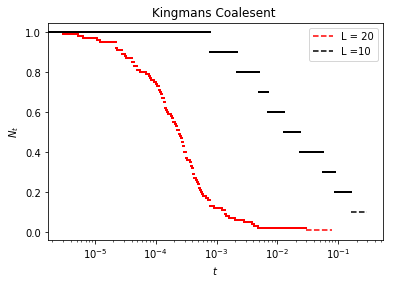

In [6]:
# sample paths of the process (2.1 d)

L=100

##### Simulate and PLOT ####

time=0.0 # initialize

for n in range(L,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time/L,(time+waitTime)/L],[n/L,n/L],'r',lw=2) # plot a bit
    
    time+=waitTime # update time
plt.plot([time/L,(time+2*waitTime)/L],[1/L,1/L],'r--', label = 'L = 20') # also add this line


#Try for fewer particles 
LL = 10
time1=0.0 # initialize

for n in range(LL,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime1=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time1/LL,(time1+waitTime1)/LL],[n/LL,n/LL],'k',lw=2) # plot a bit
    
    time1+=waitTime1 # update time

plt.plot([time1/LL,(time1+2*waitTime1)/LL],[1/LL,1/LL],'k--', label = 'L =10') # also add this line
    
plt.title('Kingmans Coalesent ')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$N_t$')

plt.yscale('linear') # linear y scale
plt.xscale('log') # change to log x scale

# Problem sheet 2 - Q2.2

## Ornstein-Uhlenbeck Process

Process $(X_t: t\geq 0)$ is a diffusion process with generator: $$ (\cal{Lf})(x) = -\alpha x f'(x) + \frac{1}{2} \sigma^2 f''(x), \  \alpha, \sigma^2 >0 $$

Given a function $f(X_t)$ we can calculate the **expectation value** via

$\frac{d}{dt}E[f(X_t)]=E[(Lf)(X_t)]\qquad$ 

**Fokker-Planck Representation:** $\frac{\partial \pi_t(y)}{\partial t}=-\alpha \frac{\partial}{\partial y}(y\pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}\pi_t(y)$

This represents Orenstein-Uhlenbeck as a drift + diffusion term.

In general the Fokker-Planck equation is a master equation of the form: $$ \frac{\partial \pi_t(y)}{\partial t}= -\frac{\partial}{\partial y}(A(y) \pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}B(y) \pi_t(y)$$

Where $B(y)>0$. The FPE is linear is $A = A_0 + A_1y$ is a linear function of $y$ and $B$ is constant. If $A_1<0$ then the stationary solution is Guassian. 

## Simulation 

The **Ornstein–Uhlenbeck process** may also be described by a **stochastic differential equation**. The SDE shows the link between the stochastic and determinisitc parts.

$dX_t=-\alpha X_t dt + \sigma dW_t$

where $dX_t$ and $dt$ are infinitesimally small and $dW_t \sim N(0,dt)$ is the Wiener increment which is normally distributed with zero mean and variance $dt$.

If we use a simple finite difference approximation we have: $ X_{t+\Delta t}=X_t -\alpha X_t \Delta t+ \sigma \Delta W_t$
where $\Delta W_t \sim N(0,\Delta t)$

To numerically integrate a SDE, we need to install [sdeint](https://pypi.org/project/sdeint/), `sudo pip3 install sdeint`

**Lets simulate!**

In [24]:
import sdeint #need to install this on your laptops: sudo pip3 install sdeint

In [22]:
##### Parameter/setup ######

alpha=1
sigma=5
x0=5 # initial condition

tmax=40.0 #max time

dt=0.01 # timestep

np.random.seed(101) # for reproducability 

############################

times=np.arange(0.0,tmax,dt) # vector of times
length=np.shape(times)[0]

x=np.zeros(length) # vector to store x values
x[0]=x0

B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise

for i in range(0,length-1): # simulate
    x[i+1]=x[i]-alpha*x[i]*dt+sigma*B[i]

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process with $\\alpha$ = 1, $\\sigma$ = 5.')

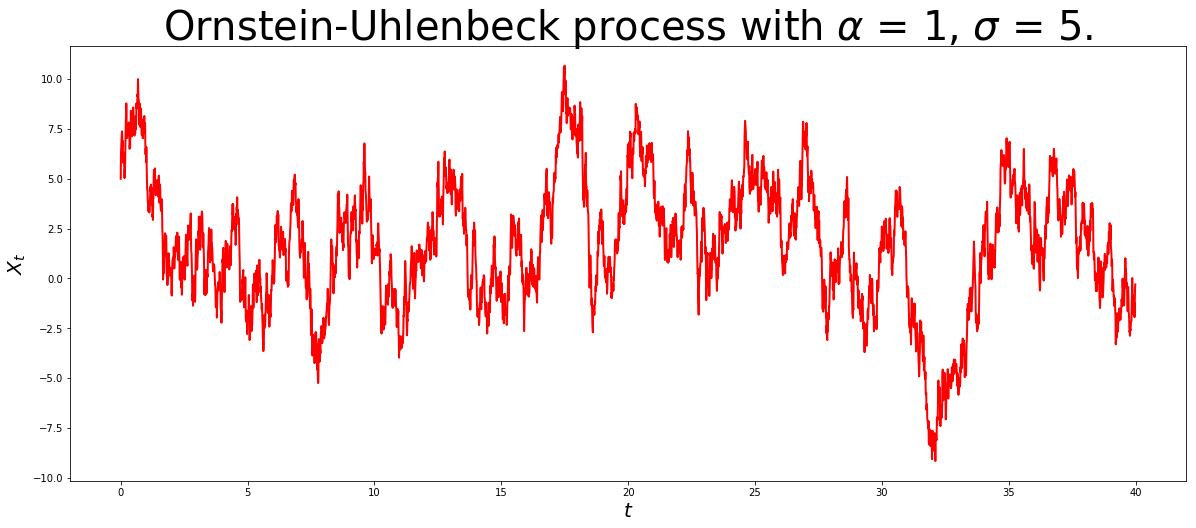

In [23]:
plt.figure(figsize = (20,8))
plt.plot(times,x,'r',lw=2)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma), fontsize = 40)

# Numerically Integrate

For Itos equation: $dy = f(y,t)dt + G(y,t) dW$.

In this example, $f(X_t,t) = - \alpha X_t$ and $G(X_t,t) = \sigma$

In [37]:
def f(x,t):
    return -alpha*x

def G(x,t):
    return sigma*np.sin(t)

In [38]:
result = sdeint.itoint(f,G, x0, times)

(array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.]),
 <a list of 10 Text yticklabel objects>)

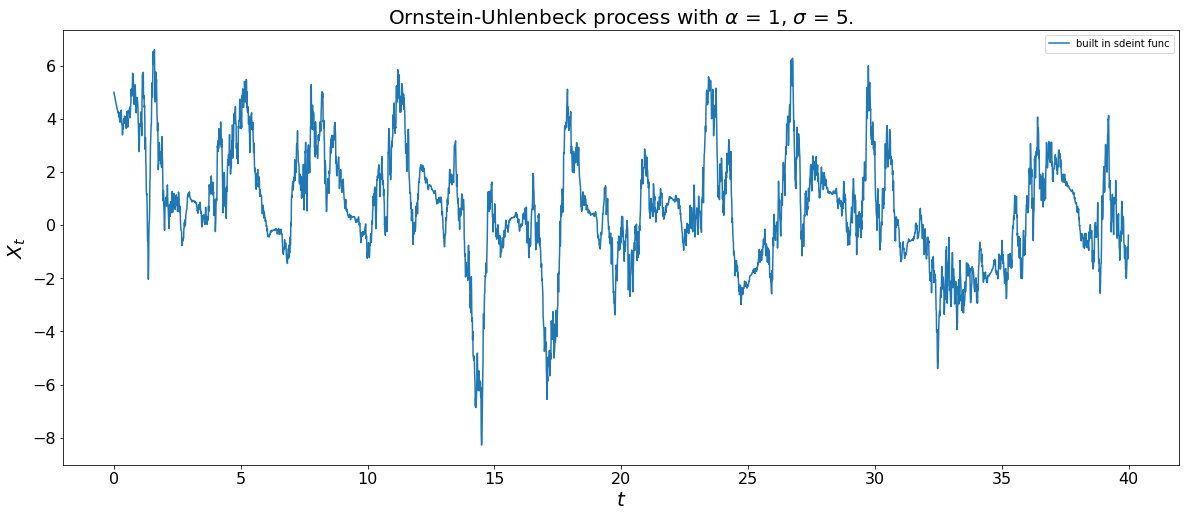

In [39]:
plt.figure(figsize = (20,8))
plt.plot(times, result, label = 'built in sdeint func')
# plt.plot(times,x,'r',lw=2, label ='we did it')
plt.legend()
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma), fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Fractional Brownian Motion 

Fractal Brownian motion (fBm), is a generalization of Brownian motion
- the increments of fBm need not be independent
- fBm is a continuous-time Gaussian process $B_H(t)$ on [0, T]
- Expectation of $B_H(t)$ is zero for all t in [0, T]
- $B_H(t)$ covariance function: $\mathbb{E} \left( B_H(t) B_H(s) \right) = \frac{1}{2} \left( |t|^{2H} + |s|^{2H} - |t-s|^{2H} \right) $ where $H$ is the hurst index ($H \in (0,1)$)
- The increment process: $X(t) = B_H(t+1) − B_H(t)$, is known as fractional Gaussian noise (fGn)

Note that for the hurst index: 
- If $H = 1/2$ then the process is in fact a Brownian motion or Wiener process;
- If $H > 1/2$ then the increments of the process are positively correlated;
- If $H < 1/2$ then the increments of the process are negatively correlated.

## Simulation 
To simulate fBm, we need to install [fbm](https://pypi.org/project/fbm/), `sudo pip3 install fbm` for: 
- **Fractional Brownian Motion**: Exact methods for simulating fractional Brownian motion (fBm) or fractional Gaussian noise (fGn) in python.
- **Multifractional Brownian Motion**: Approximate simulation of multifractional Brownian motion (mBm) or multifractional Gaussian noise (mGn).


In [8]:
from fbm import FBM

In [9]:
# n is number of equispaced increments desired for a fBm
n = 1024
# hurst is 
hurst = 0.75
# length is hurst parameter on the interval [0, length]
# method can either be 'hosking', 'cholesky', or 'daviesharte'

# IMPORTANT: can fail is hurst is close to 1 or n is small
f = FBM(n=n, hurst=hurst, length=1, method='daviesharte')


# Generate a fBm realization
fbm_sample = f.fbm()

# Generate a fGn realization
fgn_sample = f.fgn()

# Get the times associated with the fBm
t_values = f.times()

In [11]:
f1 = FBM(n, hurst = 0.8)
f2 =FBM(n, hurst = 0.5)
f3 = FBM(n, hurst = 0.2)

(array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125]), <a list of 10 Text yticklabel objects>)

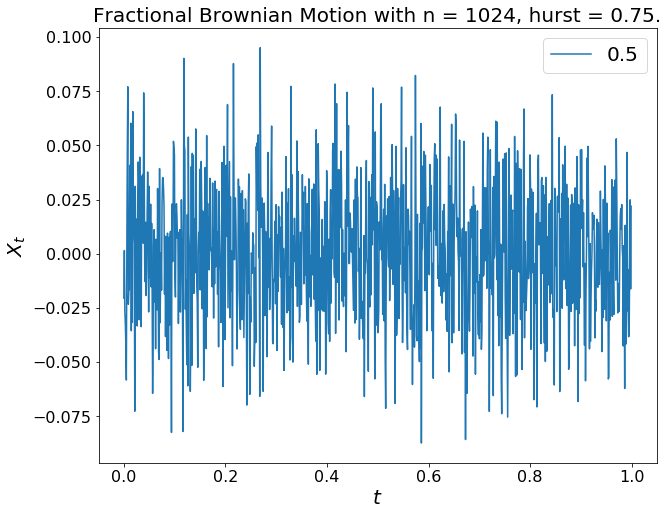

In [18]:
plt.figure(figsize=(10,8))
# plt.plot(t_values, fbm_sample, label = r'fBm $B_H(t)$')
# plt.plot(f3.times()[:n], f3.fgn(), label = r'0.2')
plt.plot(f2.times()[:n], f2.fgn(), label = r'0.5')
# plt.plot(f1.times()[:n], f1.fgn(), label = r'0.8')


# plt.plot(t_values[:n], fgn_sample, label =r'fGn $X(t)$')
plt.legend(fontsize=20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.title(r'Fractional Brownian Motion with n = {}, hurst = {}.'.format(n,hurst), fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)